# Association Rule Learning

## Recommendation Systems

1. Simple Recommender Systems (Basit Tavsiye Sistemleri)

- İş bilgisi ya da basit tekniklerle yapilan genel öneriler.
- Kategorinin en yüksek puanlilari, trend olanlar, efsaneler vs.

2. Association Rule Learning (Birliktelik Kurali Ögrenimi)

- Birliktelik analizi ile ögrenilen kurallara göre ürün önerileri

3. Content Based Filtering (içerik Temelli Filtreleme)

- Ürün benzerligine (meta bilgileri, açıklama bilgilerine) göre öneriler yapilan uzaklik temelli yöntemler

4. Collaborative Filtering (İş Birlikçi Filtreleme)

- Toplulugun kullanici ya da ürün bazinda ortak kanaatlerini yansitan yöntemler.
- User-Based
- Item-Based
- Model-Based (Matrix Factorization)


In [8]:
# Association Rule Learning

# Veri içerisindeki Örüntüleri (pattern, iliski, yapi) bulmak için kullanilan kural tabanli bir makine öğrenmesi tekniğidir.
# Kullanıcı ve ürünler arasındaki ilişkinin incelenmesiyle kullanıcının alışkanlıkları gözlemlenebilir. 
# Bu gözlemler sonucunda aksiyon alınması sağlanır. 
# Birliktelik Kuralı uygulamalarında Apriori Algoritması kullanılmaktadır.

Örneğin, markette alışveriş yapan 8 kişinin fişlerini incelediğimizi varsayalım. Bu 8 fişte yer alan ürün çiftlerini not alalım. 8 alışverişin 5’inde ekmek ve sütün aynı anda alındığını düşünürsek, siparişlerin %62’sinde ekmek ve sütün aynı anda alındığını gözlemleyebiliriz. Birliktelik Kuralını bu şekilde açıklayabiliriz.

In [9]:
# Apriori algoritması ile hasaplayacağımız ve bizim için yorumlarının değerli olduğu 3 temel metrik vardır.

# 1. Support:
# Support (x, y) = Freq(x, y) / N   (x ve y'nin birlikte görülme frekansı bölü bütün işlemler)
# X ve Y’nin birlikte görülme olaslığıdır.

# 2. Confidence:
# Confidence (x, y) = Freq(x, y) / Freq(x) (x ve y'nin birlikte görülme frekansı bölü x'in görülme frekansı)
# x satın alındığında y'nin satın alınma olasılığı

# 3. Lift:
# Lift = Support(x, y) / (Support(x) * Support(y))
# x satın alındığında y'nin satın alınma olasılığı lift kat kadar artar.

In [10]:
############################################
# ASSOCIATION RULE LEARNING (BİRLİKTELİK KURALI ÖĞRENİMİ)
############################################

# 1. Veri Ön İşleme
# 2. ARL Veri Yapısını Hazırlama (Invoice-Product Matrix)
# 3. Birliktelik Kurallarının Çıkarılması
# 4. Sepet Aşamasındaki Kullanıcılara Ürün Önerisinde Bulunmak

In [11]:
# Burada birliktelik temelli tavsiye sistemi geliştireceğiz.
# Sepet aşamasındaki kullanıcılara ürün önerisinde bulunacağız.


# Veri Seti Hikayesi
# https://archive.ics.uci.edu/ml/datasets/Online+Retail+II

# Online Retail II isimli veri seti İngiltere merkezli online bir satış mağazasının
# 01/12/2009 - 09/12/2011 tarihleri arasındaki satışlarını içeriyor.

# Değişkenler
#
# InvoiceNo: Fatura numarası. Her işleme yani faturaya ait eşsiz numara. C ile başlıyorsa iptal edilen işlem.
# StockCode: Ürün kodu. Her bir ürün için eşsiz numara.
# Description: Ürün ismi
# Quantity: Ürün adedi. Faturalardaki ürünlerden kaçar tane satıldığını ifade etmektedir.
# InvoiceDate: Fatura tarihi ve zamanı.
# UnitPrice: Ürün fiyatı (Sterlin cinsinden)
# CustomerID: Eşsiz müşteri numarası
# Country: Ülke ismi. Müşterinin yaşadığı ülke.

In [12]:
# 1. Veri Ön İşleme

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [13]:
df_=pd.read_excel("datasets/online_retail_II.xlsx",
                    sheet_name="Year 2010-2011")

df=df_.copy()
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [14]:
df.describe().T

# Miktar değerlerin minimumumunda eksi eğerler vardır.
# Ayrıca %75 lik değerlerle maximum değerler arasında uçurum vardır. Yani verimizde aykırı değerler vardır.

,count,mean,std,min,25%,50%,75%,max
Quantity,541910.0,9.552234,218.080957,-80995.00,1.00,3.00,10.00,80995.0
Price,541910.0,4.611138,96.759765,-11062.06,1.25,2.08,4.13,38970.0
Customer ID,406830.0,15287.684160,1713.603074,12346.00,13953.00,15152.00,16791.00,18287.0


In [15]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [16]:
# Bu case de eksik değerlerimizi drop edeceğiz.

df.dropna(inplace=True)
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [17]:
df = df[~df["Invoice"].str.contains("C", na=False)]

# iade faturalarını df'den çıkartıyoruz.

In [18]:
df.describe().T

# Aşağıda görüyoruz ki fiyatı 0 olan eşyalar da varmış.
# Bunları da çıkartacağız.

,count,mean,std,min,25%,50%,75%,max
Quantity,397925.0,13.021793,180.419984,1.0,2.00,6.00,12.00,80995.00
Price,397925.0,3.116212,22.096773,0.0,1.25,1.95,3.75,8142.75
Customer ID,397925.0,15294.308601,1713.172738,12346.0,13969.00,15159.00,16795.00,18287.00


In [19]:
df = df[df["Price"]>0]

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [20]:
df.describe().T

# Artık aykırı değerleri temizleme kısmına geldik.
# Aykırı değer sorunu ile ilgilenirken değişkenler için eşik bir değer hesaplayıp, aykırı değerleri bu eşik değer ile değiştireceğiz.

,count,mean,std,min,25%,50%,75%,max
Quantity,397885.0,12.988208,179.331551,1.000,2.00,6.00,12.00,80995.00
Price,397885.0,3.116525,22.097861,0.001,1.25,1.95,3.75,8142.75
Customer ID,397885.0,15294.416882,1713.144421,12346.000,13969.00,15159.00,16795.00,18287.00


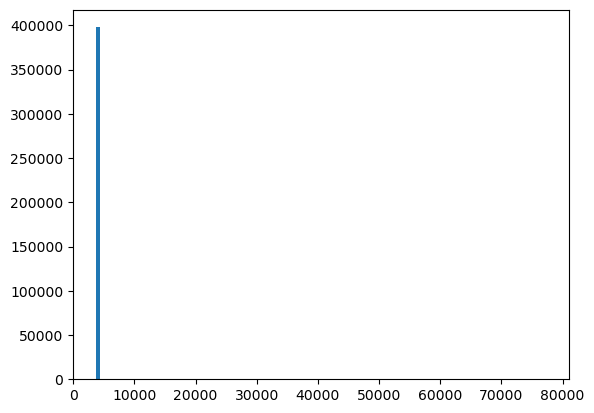

In [21]:
import matplotlib.pyplot as plt

plt.hist(df["Quantity"], rwidth=0.1)
plt.show()

In [22]:
# Aşağıda aykırı değerleri bulmak için bir formül yazacağız;

def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range    # %99'luk değerin 1.5 iqr uzaklığındaki sınır üst limittir.
    low_limit = quartile1 - 1.5 * interquantile_range   # %1'lik değerin 1.5 iqr uzaklığındaki sınır alt limittir.
    return low_limit, up_limit

In [23]:
# Aykırı değerleri bulabilmek adına sınırları belirledik, şu anda ise bu sınırlar ile aykırı değerleri baskılayacağız;

def replace_with_tresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [24]:
replace_with_tresholds(df, "Quantity")
replace_with_tresholds(df, "Price")

In [25]:
df.describe().T

# Aykırı değerleri baskıladık ve max değer büyük ölçüde düştü.

,count,mean,std,min,25%,50%,75%,max
Quantity,397885.0,11.830770,25.523052,1.000,2.00,6.00,12.00,298.50
Price,397885.0,2.893492,3.227175,0.001,1.25,1.95,3.75,37.06
Customer ID,397885.0,15294.416882,1713.144421,12346.000,13969.00,15159.00,16795.00,18287.00


In [26]:
# 2. ARL Veri Yapısını Hazırlama (Invoice-Product Matrix)

# Description   NINE DRAWER OFFICE TIDY   SET 2 TEA TOWELS I LOVE LONDON    SPACEBOY BABY GIFT SET
# Invoice
# 536370                              0                                 1                       0
# 536852                              1                                 0                       1
# 536974                              0                                 0                       0
# 537065                              1                                 0                       0
# 537463                              0                                 0                       1

# Yukarıda nihai olarak varmak istediğimiz matrix duruyor.
# Yani bir faturada olan ürünler 1 ile olmayan ürünler 0 ile gösteriliyor.
# Yani biz yukarıda faturalara sepet muamelesi yapacağız.

In [27]:
# Yukarıdaki matrix'i hazırlarken iki önemli sorun bizi bekliyor olacak;

# Birincisi bütün olası ürünleri sütunlara getirmemiz gerekecek,
# İkincisi ise sütunlara gelen ürünlerin binary sisteme (1-0) geçirilmesi gerekecek.

# Veri setine, veri setini belirli bir ülkeye indirgeyerek bakacağız. Bu ülke de Fransa olacak.
# Fransadaki insanların satın alma davranışlarını, birliktelik kuralları açısından inceleyeceğiz.

df_fr = df[df["Country"] == "France"]
df_fr

# Burada işin Business tarafında şöyle yaklaşımlar sergiliyor olacağız,
# Diyelim ki şirket yeni bir pazar arayışında ve Almanya pazarina giriş yapacak.
# Almanya pazarına ürün önerirken aynı coğrafyada yer alan Fransa pazarındaki veilerden faydalanacak.

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24.0,2010-12-01 08:45:00,3.75,12583.0,France
27,536370,22727,ALARM CLOCK BAKELIKE RED,24.0,2010-12-01 08:45:00,3.75,12583.0,France
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12.0,2010-12-01 08:45:00,3.75,12583.0,France
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12.0,2010-12-01 08:45:00,0.85,12583.0,France
30,536370,21883,STARS GIFT TAPE,24.0,2010-12-01 08:45:00,0.65,12583.0,France
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3.0,2011-12-09 12:50:00,4.95,12680.0,France


In [28]:
df_fr.groupby(["Invoice", "Description"]).agg({"Quantity" : "sum"}).head(20)

# ".groupby()" metodu ile ilk önce fatura_no, daha sonrasında ise description'a göre kırılımları gördük.
# Lakin hala istediğimiz bir formatta değil verimiz.
# Bunun için veriyi pivot table haline getirmemiz gerekmektedir.

Quantity
Invoice Description                                  
536370   SET 2 TEA TOWELS I LOVE LONDON          24.0
        ALARM CLOCK BAKELIKE GREEN               12.0
        ALARM CLOCK BAKELIKE PINK                24.0
        ALARM CLOCK BAKELIKE RED                 24.0
        CHARLOTTE BAG DOLLY GIRL DESIGN          20.0
        CIRCUS PARADE LUNCH BOX                  24.0
        INFLATABLE POLITICAL GLOBE               48.0
        LUNCH BOX I LOVE LONDON                  24.0
        MINI JIGSAW CIRCUS PARADE                24.0
        MINI JIGSAW SPACEBOY                     24.0
        MINI PAINT SET VINTAGE                   36.0
        PANDA AND BUNNIES STICKER SHEET          12.0
        POSTAGE                                   3.0
        RED TOADSTOOL LED NIGHT LIGHT            24.0
        ROUND SNACK BOXES SET OF4 WOODLAND       24.0
        SET/2 RED RETROSPOT TEA TOWELS           18.0
        SPACEBOY LUNCH BOX                       24.0
        STARS GIFT TAPE                          24.0
        VINTAGE HEADS AND TAILS CARD GAME        24.0
        VINTAGE SEASIDE JIGSAW PUZZLES           12.0

In [29]:
# İstediğimiz tablo formatına getirebilmek için ".unstack()" metodunu kullanabiliriz. 

df_fr.groupby(["Invoice", "Description"]).agg({"Quantity": "sum"}).unstack().iloc[0:5, 0:5]

# Yukarıdaki kod ile ".unstack()" metoduna kadar aşina olduğumuz bir şey yapıyoruz.
# ".unstack()" metodu hiyerarşik bir düzeni etiket düzenine dönüştürür.
# En içteki hiyerarşik düzeni bir sütun etiketine (değişkenine, ismine) dönüştürür.

# ".iloc()" metodu ile ise tablonun belirli bir kısmını görüyoruz sadece.

Quantity                     \
Description  50'S CHRISTMAS GIFT BAG LARGE  DOLLY GIRL BEAKER   
Invoice                                                         
536370                                 NaN                NaN   
536852                                 NaN                NaN   
536974                                 NaN                NaN   
537065                                 NaN                NaN   
537463                                 NaN                NaN   

                                                                   \
Description  I LOVE LONDON MINI BACKPACK  NINE DRAWER OFFICE TIDY   
Invoice                                                             
536370                               NaN                      NaN   
536852                               NaN                      NaN   
536974                               NaN                      NaN   
537065                               NaN                      NaN   
537463                               NaN                      NaN   

                                              
Description  SET 2 TEA TOWELS I LOVE LONDON   
Invoice                                       
536370                                  24.0  
536852                                   NaN  
536974                                   NaN  
537065                                   NaN  
537463                                   NaN

In [30]:
# Yukarıdaki düzene dönüştürdükten sonra yapmamız gereken bir sonraki işlem ise,
# Yukarıdaki eksik eğerler ("NaN" values) yerine 0, diğer değerler yerine 1 yazsın.

df_fr.groupby(["Invoice", "Description"]).agg({"Quantity": "sum"}).unstack().fillna(0).iloc[0:5, 0:5]

Quantity                     \
Description  50'S CHRISTMAS GIFT BAG LARGE  DOLLY GIRL BEAKER   
Invoice                                                         
536370                                 0.0                0.0   
536852                                 0.0                0.0   
536974                                 0.0                0.0   
537065                                 0.0                0.0   
537463                                 0.0                0.0   

                                                                   \
Description  I LOVE LONDON MINI BACKPACK  NINE DRAWER OFFICE TIDY   
Invoice                                                             
536370                               0.0                      0.0   
536852                               0.0                      0.0   
536974                               0.0                      0.0   
537065                               0.0                      0.0   
537463                               0.0                      0.0   

                                              
Description  SET 2 TEA TOWELS I LOVE LONDON   
Invoice                                       
536370                                  24.0  
536852                                   0.0  
536974                                   0.0  
537065                                   0.0  
537463                                   0.0

In [31]:
# Bir önceki kod ile boşlıklara "0" değerini yazdırdık, şimdi ise "1" değerlerinin yazdırmak kaldı,

df_fr.groupby(["Invoice", "Description"]).agg({"Quantity": "sum"}).unstack().fillna(0). \
    applymap(lambda x: 1 if x >0 else 0).iloc[0:5, 0:5]
    

# Yukarıdaki kod bloğunun 1. satırında bir önceki işlemin aynısı yaptık.
# Ters slash işaretinden sonra ise ".applymap()" metodunu kullandık.
# 
# ".apply()" metodu belirtilen bütün satır veya sütunları gezerken ".applymap()" metodu ise bütün gözlemleri gezmektedir.

# Detaylı bilgi için;
# "https://towardsdatascience.com/introduction-to-pandas-apply-applymap-and-map-5d3e044e93ff#:~:text=apply()%20is%20used%20to,function%20to%20a%20DataFrame%20elementwise."

Quantity                     \
Description  50'S CHRISTMAS GIFT BAG LARGE  DOLLY GIRL BEAKER   
Invoice                                                         
536370                                   0                  0   
536852                                   0                  0   
536974                                   0                  0   
537065                                   0                  0   
537463                                   0                  0   

                                                                   \
Description  I LOVE LONDON MINI BACKPACK  NINE DRAWER OFFICE TIDY   
Invoice                                                             
536370                                 0                        0   
536852                                 0                        0   
536974                                 0                        0   
537065                                 0                        0   
537463                                 0                        0   

                                              
Description  SET 2 TEA TOWELS I LOVE LONDON   
Invoice                                       
536370                                     1  
536852                                     0  
536974                                     0  
537065                                     0  
537463                                     0

In [32]:
# Yukarıdaki tabloların sütunlarında description'lar bulunmaktadır.
# Lakin Description'lar uzundur. Bunun yerine stock code'lar da kullanılabilir.

fr_inv_pro_df = df_fr.groupby(['Invoice', "StockCode"])['Quantity'].sum().unstack().fillna(0). \
            applymap(lambda x: 1 if x > 0 else 0)


In [33]:
fr_inv_pro_df

StockCode,10002,10120,10125,10135,11001,15036,15039,16012,16048,16218,...,85232D,90030B,90030C,90184B,90184C,90201B,90201C,C2,M,POST
Invoice,,,,,,,,,,,,,,,,,,,,,
536370,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
581001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
581171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
# Eğer ki arada bir id'nin ismini öğrenmek istersem diye de bir fonksiyon yazacağız;

def check_id(dataframe, stock_code):
    product_name = dataframe[dataframe["StockCode"] == stock_code][["Description"]].values[0].tolist()
    print(product_name)

# Fonksiyonun detaylı açıklaması için aşağıdaki kısımlara bakınız.,

In [35]:
# Yukarıdaki gibi ".values[]" metodunu çalıştırmazsak aşağıdaki gibi bir dataframe gelir.
# Biz bu dataframe'in ilk değerini (0. indeksteki) istediğimizi söylüyoruz.

df[df["StockCode"] == 10002][["Description"]].head()

,Description
31,INFLATABLE POLITICAL GLOBE
142,INFLATABLE POLITICAL GLOBE
5466,INFLATABLE POLITICAL GLOBE
7598,INFLATABLE POLITICAL GLOBE
10168,INFLATABLE POLITICAL GLOBE


In [36]:
# ".values[]" metodu aşağıda görüldüğü gibi bize bir array döndürmektedir.

df[df["StockCode"] == 10002][["Description"]].values[0]

array(['INFLATABLE POLITICAL GLOBE '], dtype=object)

In [37]:
# ".tolist()" metodu ile array'i liste formatına çeviriyoruz.

df[df["StockCode"] == 10002][["Description"]].values[0].tolist()

['INFLATABLE POLITICAL GLOBE ']

In [38]:
# 10002 stok kodlu ürünün ismine bakalım;

check_id(df_fr, 10002)

['INFLATABLE POLITICAL GLOBE ']


In [39]:
# 3. Birliktelik Kurallarının Çıkarılması

# Bu bölümde apriori fonksiyonu ile olası bütün ürün birlikteliklerin support değerlerine bakacağız.

frequent_itemsets = apriori(fr_inv_pro_df, min_support=0.01, use_colnames=True)

# Apriori fonksiyonu içerisine;
# analizin yapılacağı dataframe'i,
# "min_support=" argümanı ile istenilen minimum support değerini sorar. Default'ta 0.5 olarak gelir.
# gönderdiğin df'deki değişken isimlerini de kullanmak istiyorsan, "use_colnames=" argümanını "True" yapmılmasını ister.
# "use_colnames=" argümanını default'ta false'dır. 

/Users/emintaskent/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [40]:
frequent_itemsets.sort_values("support", ascending=False)

# Aşağıda ürün çiftlerinin (Çift derken ikinci ürün başka ürünlerin kombinasyonundan da oluşuyor olabilir!!) support değerleri hesaplanmıştır.
# min support değeri 0.01 olan ürünler dataframe de bulunmamaktadır.

,support,itemsets
538,0.773779,(POST)
387,0.187661,(23084)
107,0.179949,(21731)
243,0.172237,(22554)
245,0.169666,(22556)
...,...,...
18793,0.010283,"(22729, 21086, 22326, 22551)"
18787,0.010283,"(23256, 21086, 22492, 22326)"
18786,0.010283,"(22728, 21086, 22492, 22326)"
18785,0.010283,"(21086, 22492, 22326, 22727)"


In [41]:
# Lakin bizim ihtiyacımız olan veri için birliktelik kuralları oluşturabilmektir.
# Bunu yaparken de "association_rules()" fonksiyonunu kullanacağız.

rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.01)

# association_rules() fonksiyonunun içerisine;
# argüman olarak hangi tabloya bakması gerektiğini giriyoruz.
# hangi metrikten faydalanacağını giriyoruz.
# ve minimum treshold giriyoruz.

In [42]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(10002),(21791),0.020566,0.028278,0.010283,0.500000,17.681818,0.009701,1.943445
1,(21791),(10002),0.028278,0.020566,0.010283,0.363636,17.681818,0.009701,1.539111
2,(10002),(21915),0.020566,0.069409,0.010283,0.500000,7.203704,0.008855,1.861183
3,(21915),(10002),0.069409,0.020566,0.010283,0.148148,7.203704,0.008855,1.149771
4,(10002),(22551),0.020566,0.136247,0.010283,0.500000,3.669811,0.007481,1.727506
...,...,...,...,...,...,...,...,...,...
1372699,(23254),"(22659, 23206, 22726, 22727, 22728, 20750, 223...",0.071979,0.010283,0.010283,0.142857,13.892857,0.009543,1.154670
1372700,(22326),"(22659, 23206, 22726, 22727, 22728, 20750, 223...",0.159383,0.010283,0.010283,0.064516,6.274194,0.008644,1.057974
1372701,(21558),"(22659, 23206, 22726, 22727, 22728, 20750, 223...",0.051414,0.010283,0.010283,0.200000,19.450000,0.009754,1.237147
1372702,(23291),"(22659, 23206, 22726, 22727, 22728, 20750, 223...",0.041131,0.010283,0.010283,0.250000,24.312500,0.009860,1.319623


#### Aşağıdaki tablonun yorumlamasına gelirsek;

* antecedents : birinci üründür.
* consequents : ikinci üründür (veya ürünlerdir).
* antecedent support : ilk ürünün tek başına gözlenme olasılığıdır. (Yani support değeridir.)
* consequent support : ikinci ürün veya ürünlerin tek başına gözlenme olasılığıdır.
* support : iki ürünün birlikte gözükme olasılığıdır.
* confidence : x ürünü alındığında y'nin alınması olasılığıdır.
* lift : x ürünü satın alındığında y ürünün alınma olasığı "lift" kat artmasıdır.
* leverage : lift değerine çok benzer. Lakin support'u yüksek olan ürün gruplarına öncelik veren bir değerdir. Dolayısıyla yanlıdır. (Lift bizim için daha önemlidir.)
* conviction : Bu değere odaklanmayacağız.

            Support değerinin Lift değerine oranının birden büyük olması Lift istatistiğinin bir bağımlılık ölçüsü olduğunu (birbirlerini etkilediğini) gösterir


In [43]:
# Şimdi tabloyu biraz inceleyelim;

rules[(rules["support"] > 0.05) & (rules["confidence"] > 0.1) & (rules["lift"] > 5)]

# Yukarıda birlikte gözlemlenme potansiyeli %5'ten daha fazla, 
# ikinci ürünün alınma ihtimali %10'dan daha büyük 
# ve ikici ürünün alınma olasılığı en az 5 kat artsın filtrelerini koyduk.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1606,(21080),(21086),0.133676,0.138817,0.102828,0.769231,5.541311,0.084271,3.731791
1607,(21086),(21080),0.138817,0.133676,0.102828,0.740741,5.541311,0.084271,3.341535
1608,(21080),(21094),0.133676,0.128535,0.102828,0.769231,5.984615,0.085646,3.776350
1609,(21094),(21080),0.128535,0.133676,0.102828,0.800000,5.984615,0.085646,4.331620
1776,(21086),(21094),0.138817,0.128535,0.123393,0.888889,6.915556,0.105550,7.843188
...,...,...,...,...,...,...,...,...,...
213940,"(POST, 22727)","(22728, 22726)",0.089974,0.074550,0.059126,0.657143,8.814778,0.052418,2.699229
213941,"(22726, 22727)","(22728, POST)",0.079692,0.092545,0.059126,0.741935,8.017025,0.051751,3.516388
213942,(22728),"(POST, 22726, 22727)",0.102828,0.074550,0.059126,0.575000,7.712931,0.051460,2.177529
213944,(22726),"(22728, POST, 22727)",0.097686,0.069409,0.059126,0.605263,8.720273,0.052346,2.357498


In [44]:
rules[(rules["support"] > 0.05) & (rules["confidence"] > 0.1) & (rules["lift"] > 5)].sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
23707,"(21080, 21094)",(21086),0.102828,0.138817,0.100257,0.975000,7.023611,0.085983,34.447301
23706,"(21080, 21086)",(21094),0.102828,0.128535,0.100257,0.975000,7.585500,0.087040,34.858612
108822,"(POST, 21080, 21094)",(21086),0.084833,0.138817,0.082262,0.969697,6.985410,0.070486,28.419023
108820,"(POST, 21080, 21086)",(21094),0.084833,0.128535,0.082262,0.969697,7.544242,0.071358,28.758355
1777,(21094),(21086),0.128535,0.138817,0.123393,0.960000,6.915556,0.105550,21.529563
...,...,...,...,...,...,...,...,...,...
7212,(22629),(22630),0.125964,0.100257,0.071979,0.571429,5.699634,0.059351,2.099400
62249,(22630),"(POST, 22629)",0.100257,0.100257,0.053985,0.538462,5.370809,0.043933,1.949443
62244,"(POST, 22629)",(22630),0.100257,0.100257,0.053985,0.538462,5.370809,0.043933,1.949443
62248,(22629),"(POST, 22630)",0.125964,0.074550,0.053985,0.428571,5.748768,0.044594,1.619537


In [45]:
check_id(df_fr, 21080)
check_id(df_fr, 21094)
check_id(df_fr, 21086)

# Yukarıdaki df'nin ilk satırından yola çıkarak;

# 'SET/20 RED RETROSPOT PAPER NAPKINS' ve SET/6 RED SPOTTY PAPER PLATES' ürünlerini alan bir kişinin 
# 'SET/6 RED SPOTTY PAPER CUPS' ürününü alma ihtimali çok yüksektir. Dolayısıyla bu ürün önerilebilir.

['SET/20 RED RETROSPOT PAPER NAPKINS ']
['SET/6 RED SPOTTY PAPER PLATES']
['SET/6 RED SPOTTY PAPER CUPS']


In [46]:
# 4. Sepet Aşamasındaki Kullanıcılara Ürün Önerisinde Bulunmak

# Bir kullanıcı ürünü sepetine eklediğinde önereceğimiz ürünlerin bir tablo içerinde hazır olması gerekmektedir.
# Bu kısımda artık bunu durumu hazırlıyor olacağız.

In [47]:
# Örnek:
# Kullanıcı örnek ürün id: 22492

product_id= 22492
check_id(df, product_id)

['MINI PAINT SET VINTAGE ']


In [48]:
sorted_rules = rules.sort_values("lift", ascending=False)

# Kural tablomu lift değerine göre sıralıyorum. İstersek "confidence" veya "support" değerlerine göre de sıralayabiliriz.
# Bu tamamen hangi değişkene öncelik verdiğimiz ile ilgilidir.

sorted_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1082358,"(22659, 23206, 22726, 22727)","(21558, 23254, 22326, 23199)",0.010283,0.010283,0.010283,1.0,97.25,0.010177,inf
1160023,"(22727, 22728, 22352, 23254, 23199)","(22326, 21558, 22726, 20750)",0.010283,0.010283,0.010283,1.0,97.25,0.010177,inf
1160025,"(22727, 22728, 21558, 23254, 22326)","(22352, 23199, 22726, 20750)",0.010283,0.010283,0.010283,1.0,97.25,0.010177,inf
1160026,"(22727, 22728, 23254, 22326, 23199)","(22352, 21558, 22726, 20750)",0.010283,0.010283,0.010283,1.0,97.25,0.010177,inf
1160027,"(22727, 22728, 21558, 22326, 23199)","(22352, 23254, 22726, 20750)",0.010283,0.010283,0.010283,1.0,97.25,0.010177,inf


In [49]:
recommendation_list = []

for i, product in enumerate(sorted_rules["antecedents"]):
    for j in list(product):
        if j == product_id:
            recommendation_list.append(list(sorted_rules.iloc[i]["consequents"])[0])

# Yukarıdaki kod bloğunun ilk satırında "enumerate()" fonksiyonu ile bir döngü oluşturuyoruz, zira indeks bilgileri ileride işimize yarayacak.
# İlk satırda hem "antecedents" değişkenin de hem de indekslerin de gezmesi gerektiğini söylüyorum.
# Yukarıdaki tablodan da görüle bildiği gibi "antecedents" sütununda birden fazla ürün olan değişkenler de bulunmaktadır. Örneğin;
# İlk satırda bulunan, 1082358. indeksteki "(22659, 23206, 22726, 22727)" değeri gibi.

# Dolayısıyla benim bu set veya tuple değişkeni içerisinde dolaşıp istediğim ürünü yakalayabiliyor olamam gerekir.
# Bunun içinde dolaşmak diyince de aklımıza bir döngü daha yazmak gerektiği gelir.

# Bu döngüyü yazabilmek için bu set'i (set tabiri daha doğru olacaktır çünkü kümedir.) listeye çevirmem gerekir.
# Bir değişken formatı uygunsa listeye çevirebilmek için "list()" fonksiyonunu kullanırız.
# Daha sonrasında bu listenin içerisinde benim istediğim "product_id"ye eşit bir değer var mı buna bakarız.
# Bunu kontrol edebilmek için 3. satırdaki if bloğunu yazarız.

# Eğer ki "j == product_id" koşulu da sağlanırsa;
# Yukarıda tanımladığım boş listeye "j == product_id" koşulunun sağlandığı indeksin "consequents" değişkeni altındaki 0. indekste bulunan;
# "StockCode" değerini ekler.

# Yukarıdaki koşul gerçekleştikçe recommendation_list içine StockCode eklenir.

In [50]:
recommendation_list[0:3]

# Yukarıda liste içerisindeki ilk 3 değer sorulmuştur.
# Listenin içerisinde çok fazla ürün bulunmaktadır.

# Unutulmamalıdır ki bütün ürünleri önermek önerinin ikna etme yeteniğini azaltacaktır. Tavsiye olarak en fazla 3 adet ürün önerilmelidir.


[22556, 22551, 22326]

In [51]:
# Ürünümüzü hatırlayalım;

# Kullanıcı örnek ürün id: 22492
check_id(df, 22492)
check_id(df, 22326)

# Yukarıdaki çalışmamızdan edindiğimiz sonuca göre;

# 'MINI PAINT SET VINTAGE ' ürününü alan bir kullanıcıya 'ROUND SNACK BOXES SET OF4 WOODLAND ' ürünü önerilebilir.

['MINI PAINT SET VINTAGE ']
['ROUND SNACK BOXES SET OF4 WOODLAND ']


In [52]:
# Yukarıda öğrendiğimiz kodları bir fonksiyon haline getirmek istersek;

def arl_recommender(rules_df, product_id, rec_count=1):
    sorted_rules = rules_df.sort_values("lift", ascending=False)
    recommendation_list = []
    for i, product in enumerate(sorted_rules["antecedents"]):
        for j in list(product):
            if j == product_id:
                recommendation_list.append(list(sorted_rules.iloc[i]["consequents"])[0])

    return recommendation_list[0:rec_count]

In [53]:
arl_recommender(rules, 22492, 1)
arl_recommender(rules, 22492, 2)
arl_recommender(rules, 22492, 3)

[22556, 22551, 22326]